<a href="https://colab.research.google.com/github/Cehiim/ImagePreProcessing/blob/main/image_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redução de Dimensionalidade em Imagens para Redes Neurais

Importando a imagem

In [1]:
!git clone https://github.com/Cehiim/ImagePreProcessing.git

Cloning into 'ImagePreProcessing'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 466.79 KiB | 5.69 MiB/s, done.
Resolving deltas: 100% (1/1), done.


Importando bibliotecas

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np

## Imagem original

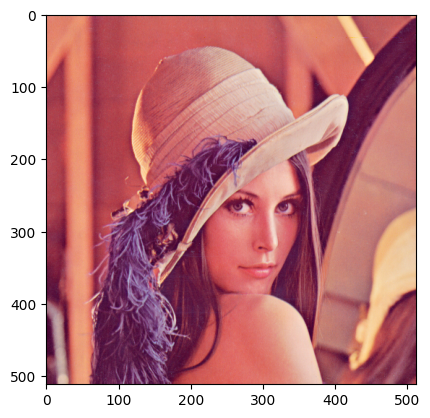

In [3]:
path = 'ImagePreProcessing/lenna.png'
image = Image.open(path)
plt.imshow(image)

## Imagem em escala cinza
1. Inicialmente foi obtido a matriz que representa a imagem original

2. Depois foi usado a fórmula NTSC para calcular a luminância monocromática do cinza:
$$
(0.299 \times Red) + (0.587 \times Green) + (0.114 \times Blue)
$$

3. Em seguida, os valores obtidos pela fórmula são inseridos na matriz de escala cinza

4. Por fim, a nova matriz é convertida para imagem

In [4]:
def grayscale(img):
  img_array = np.array(img)

  # Faz o produto apenas dos valores apenas da 3ª dimensão que representa o canal de cores
  gray_array = np.dot(img_array[..., :3], [0.299, 0.587, 0.114])

  # O método fromarray() gera uma imagem a partir de um array
  # 'L' para gerar uma imagem de luminância monocromática
  gray_img = Image.fromarray(gray_array.astype(np.uint8), mode='L')

  return gray_img

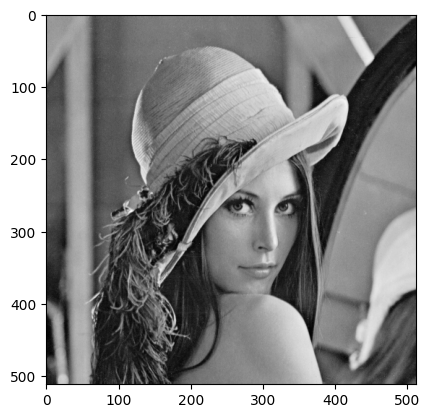

In [5]:
gray_image = grayscale(image)
plt.imshow(gray_image, cmap='gray')

## Imagem binária
1. Inicialmente a imagem original é convertida para a escala cinza

2. Depois é aplicado um limiar (*threshold*) para definir o valor de cada *pixel* em 0 (preto) ou 255 (branco)

In [6]:
def binaryscale(img):
  gray_img = grayscale(img)

  # O método point() aplica uma função a todos os pixels de uma imagem
  # '1' para gerar uma imagem binária
  threshold = 127
  bi_img = gray_img.point(lambda x: 255 if x > threshold else 0, mode='1')

  return bi_img

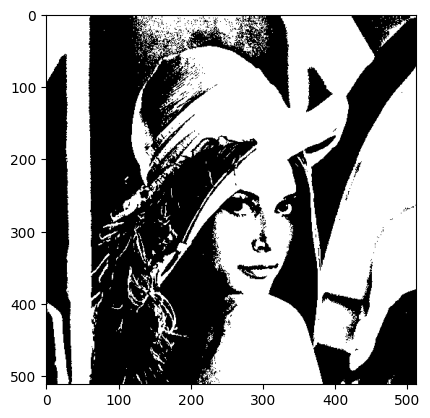

In [7]:
binary_image = binaryscale(image)
plt.imshow(binary_image)